# Data Visualizations
Cassady Jackson and Baylie Schnieder

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
import re
from collections import Counter

In [23]:
top_ten = pd.read_csv('TopTenStates.csv')
bottom_ten = pd.read_csv('BottomTen.csv')

## Bar Plot for States with Highest Ranking vs Rate of Chronic Illness

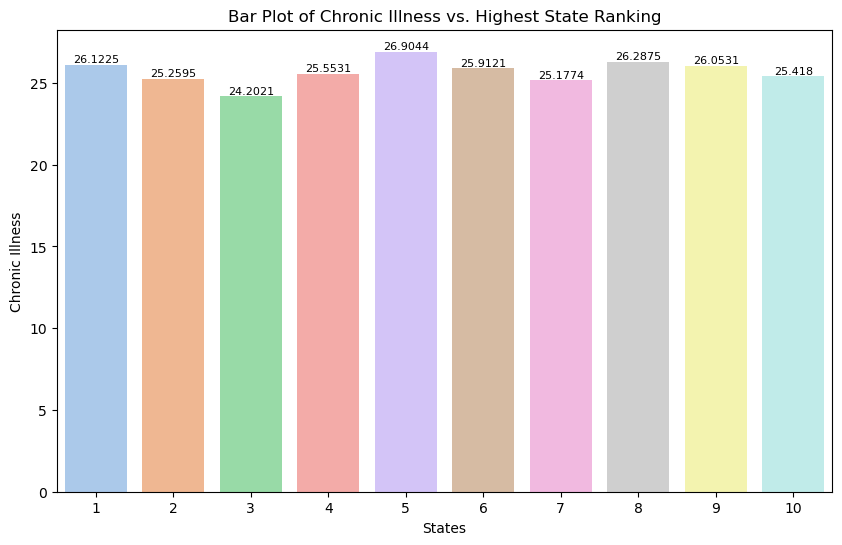

In [24]:
plt.figure(figsize=(10, 6)) # size of the plot in inches (width, height)
ax = sns.barplot(x=top_ten['Overall Public School Rank 2022'], y=top_ten['DataValue'], errorbar=None, palette='pastel', hue=top_ten['Overall Public School Rank 2022'], legend=False)
plt.title('Bar Plot of Chronic Illness vs. Highest State Ranking')
plt.xlabel('States')
plt.ylabel('Chronic Illness')
plt.grid(False)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=8)
plt.savefig('top_10_rates.jpg', dpi=300)
plt.show()

### Bar Plot for States with Lowest Ranking vs Chronic Illness

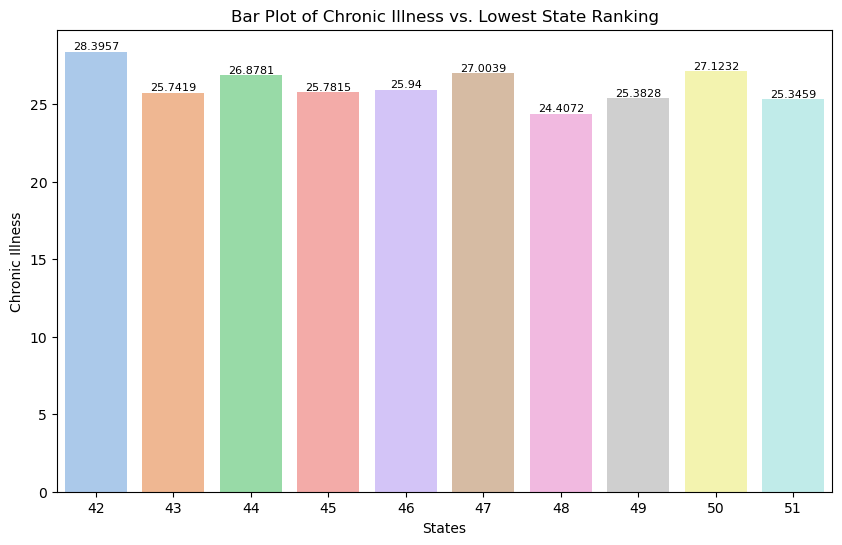

In [25]:
#bottom_ten = bottom_ten.groupby('Overall Public School Rank 2022')
plt.figure(figsize=(10, 6)) # size of the plot in inches (width, height)
ax = sns.barplot(x=bottom_ten['Overall Public School Rank 2022'], y=bottom_ten['DataValue'], errorbar=None, palette='pastel', hue=bottom_ten['Overall Public School Rank 2022'], legend=False)
plt.title('Bar Plot of Chronic Illness vs. Lowest State Ranking')
plt.xlabel('States')
plt.ylabel('Chronic Illness')
plt.grid(False)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=8)
plt.savefig('bottom_10_rates.jpg', dpi=300)
plt.show()

In [26]:
state_data = pd.read_csv('State_Unique_Data.csv')

In [27]:
def bottom_25(state):
    if state <= 25:
        return 'Top'
    else:
        return 'Bottom'

state_data['Ranking Level'] = state_data['Overall Public School Rank 2022'].apply(bottom_25)

display(state_data.head(1))

,YearEnd,LocationAbbr,State,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,Overall Public School Rank 2022,Higher Ed Quality 2022,School Safety Rank 2022,Ranking Level
0,2022,OH,Ohio,BRFSS,Disability,Adults with any disability,%,Age-adjusted Prevalence,42.8,42.8,...,39,DIS,DIS01,AGEADJPREV,RACE,MRC,32,33,39,Bottom


In [28]:
bottom_data = state_data.copy()
bottom_data = bottom_data.drop(bottom_data[bottom_data['Ranking Level'] != 'Bottom'].index)
display(bottom_data.head(1))

,YearEnd,LocationAbbr,State,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,Overall Public School Rank 2022,Higher Ed Quality 2022,School Safety Rank 2022,Ranking Level
0,2022,OH,Ohio,BRFSS,Disability,Adults with any disability,%,Age-adjusted Prevalence,42.8,42.8,...,39,DIS,DIS01,AGEADJPREV,RACE,MRC,32,33,39,Bottom


In [29]:
top_data = state_data.copy()
top_data = top_data.drop(top_data[top_data['Ranking Level'] != 'Top'].index)

In [30]:
def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    return text.strip()

bottom_data['cleaned_topic'] = bottom_data['Topic'].apply(preprocess_text)
bottom_data = bottom_data.drop_duplicates()

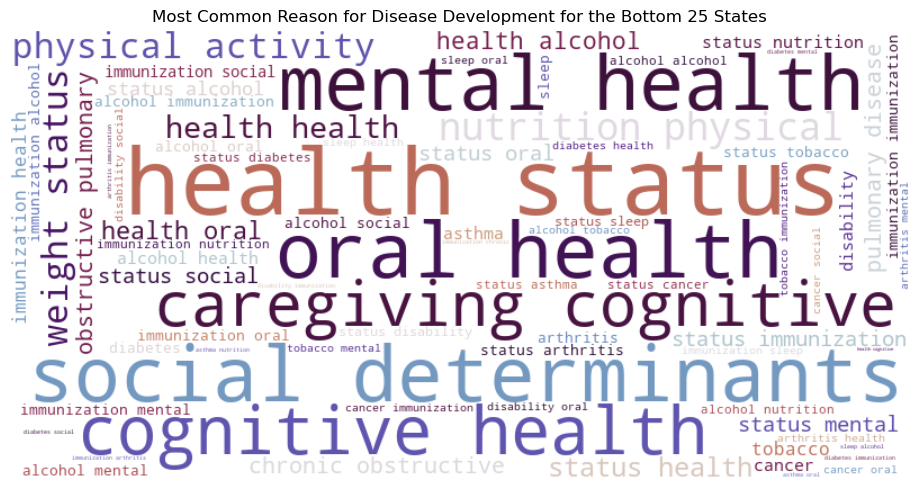

In [31]:
alltext = ' '.join(bottom_data['cleaned_topic'])

wordcloud = WordCloud(
    width = 800,
    height = 400,
    background_color = 'white',
    colormap='twilight_shifted',
).generate(alltext)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Reason for Disease Development for the Bottom 25 States')
plt.tight_layout()
plt.savefig('bottom_25_reasonings.jpg', dpi=300)
plt.show()

In [32]:
top_data['cleaned_topic'] = top_data['Topic'].apply(preprocess_text)
top_data = top_data.drop_duplicates()

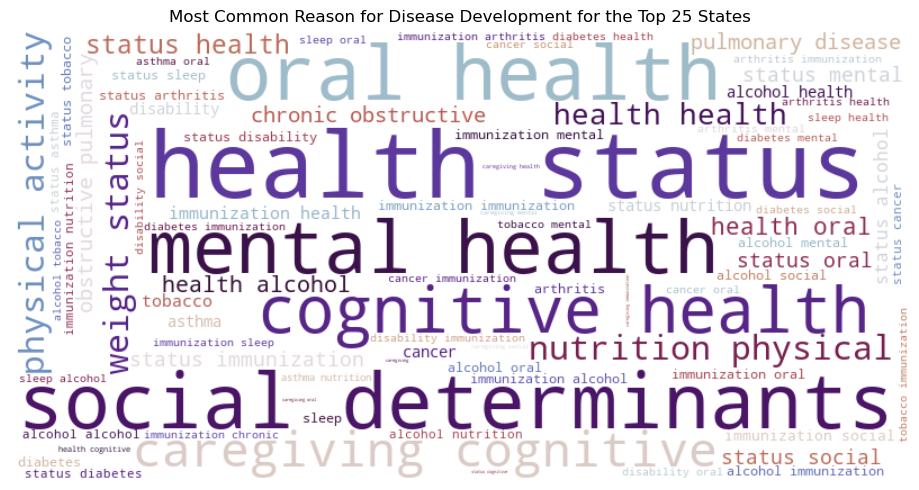

In [33]:
all_text = ' '.join(top_data['cleaned_topic'])

wordcloud = WordCloud(
    width = 800,
    height = 400,
    background_color = 'white',
    colormap='twilight_shifted',
).generate(alltext)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Reason for Disease Development for the Top 25 States')
plt.tight_layout()
plt.savefig('top_25_reasonings.jpg', dpi=300)
plt.show()